# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from tensorflow.keras.models import Sequential
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.layers import SimpleRNN

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

# تم تحميل الداتا من الموقع ورفعها بسبب تاخر عمليه الاستيراد

In [2]:
df_week_5 = pd.read_csv('/content/Traffic Data.csv')

In [3]:
df_week_5.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [4]:
df_week_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df_week_5.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


In [24]:
df_week_5.shape

(20000, 7)

In [7]:
df_week_5.isnull().sum()

# (traffic_volume = 20)

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [25]:
df_week_5 = df_week_5.dropna(subset=['traffic_volume'])

In [26]:
df_week_5.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [9]:
#date time => object
#convert date time label from object to date time type =)
df_week_5['date_time'] = pd.to_datetime(df_week_5['date_time'])

In [10]:
df_week_5.info()
#its good  , converted is seccssful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       19980 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [11]:
# set the index
df_week_5.set_index('date_time', inplace=True)

In [12]:
df_week_5.head()
#Time & date index made

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


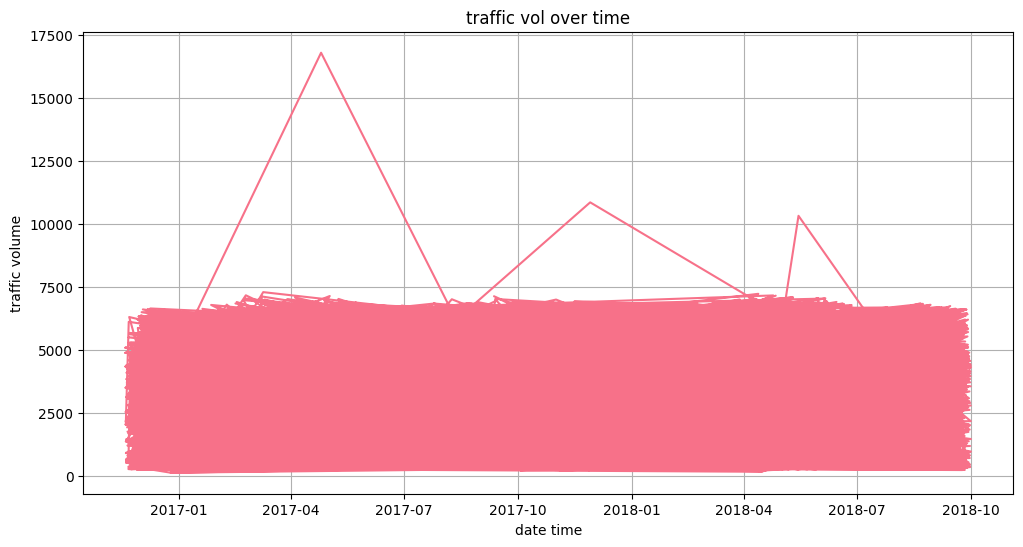

In [27]:
#sns.set_palette("hus1")
plt.figure(figsize=(12,6))
plt.plot(df_week_5['traffic_volume'])
plt.title('traffic vol over time')
plt.xlabel('date time')
plt.ylabel('traffic volume')
plt.grid(True)
plt.show()


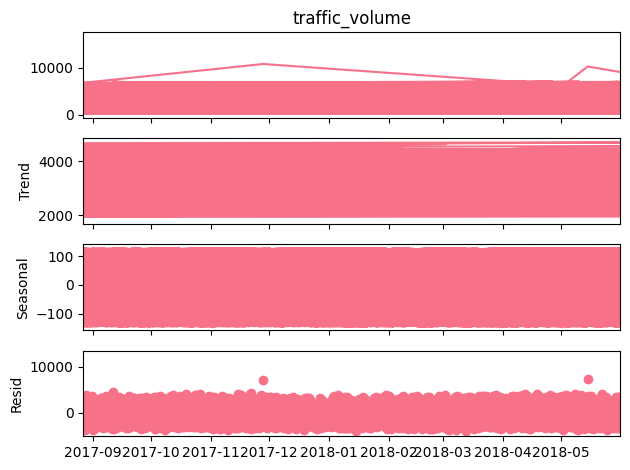

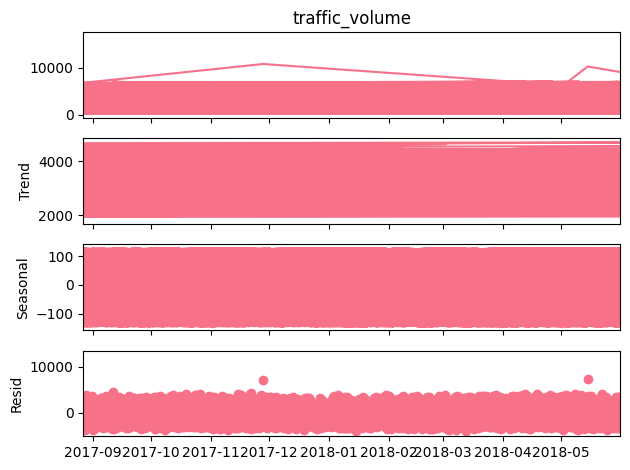

In [33]:
#Analyze trends
decomposition = seasonal_decompose(df_week_5['traffic_volume'], model='additive', period=24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
decomposition.plot()

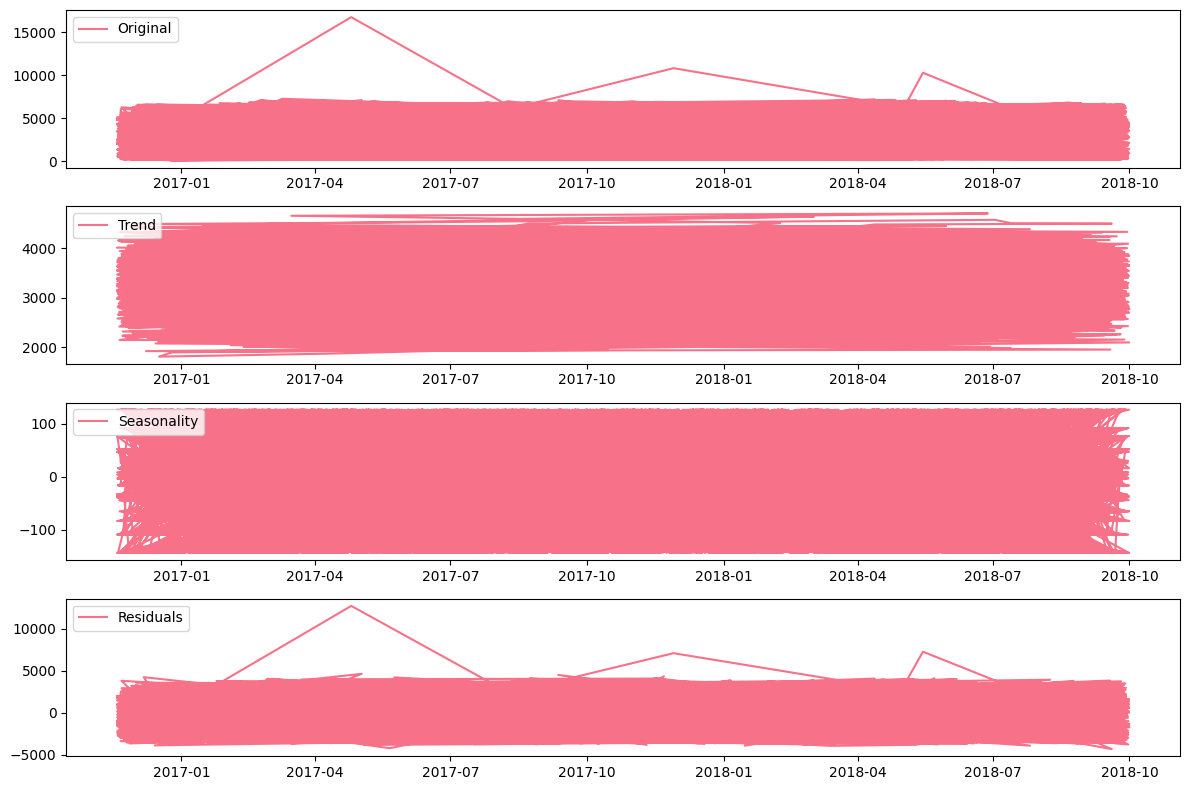

In [34]:
# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_week_5['traffic_volume'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


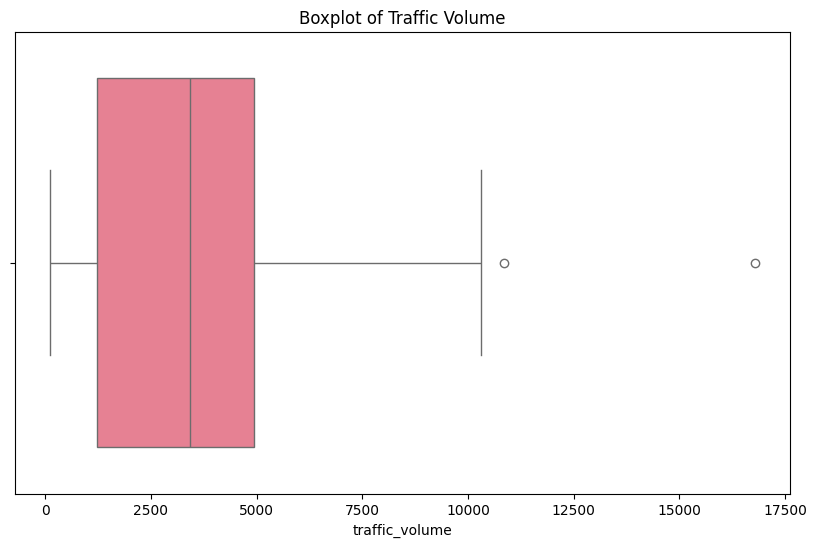

In [36]:
#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_week_5['traffic_volume'])
plt.title('Boxplot of Traffic Volume')
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

### Handle any missing values in the dataset.

In [37]:
df_week_5.isnull().sum()
#تم التعامل مع القسم المفقوده بالاعلى
#تم حذف القيم المفقوده

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


###If necessary, resample the data to ensure consistent time intervals.

In [38]:
df_daily = df_week_5.resample('D').sum()

In [39]:
df_daily.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18,67940.0,5471.65,0.0,0.0,1700,FogSnowMistMistFogSnowMistFogSnowSnowMistMistS...,fogheavy snowmistmistfogheavy snowmistfogheavy...
2016-11-19,65048.0,6505.16,0.0,0.0,1288,CloudsHazeHazeCloudsCloudsCloudsCloudsSnowSnow...,overcast cloudshazehazeovercast cloudsovercast...
2016-11-20,53556.0,6469.56,0.0,0.0,876,ClearClearClearClearCloudsCloudsClearCloudsClo...,sky is clearsky is clearsky is clearsky is cle...
2016-11-21,78376.0,6519.71,0.0,0.0,145,CloudsClearClearClearClearClearClearClearClear...,scattered cloudssky is clearsky is clearsky is...
2016-11-22,170238.0,14251.61,0.0,0.0,4235,ClearClearClearClearClearCloudsSnowRainRainSno...,sky is clearsky is clearsky is clearsky is cle...


In [40]:
df_weekly = df_week_5.resample('W').sum()

In [41]:
df_weekly.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-20,186544.0,18446.370,0.0,0.0,3864,FogSnowMistMistFogSnowMistFogSnowSnowMistMistS...,fogheavy snowmistmistfogheavy snowmistfogheavy...
2016-11-27,743347.0,79994.920,0.0,0.0,19902,CloudsClearClearClearClearClearClearClearClear...,scattered cloudssky is clearsky is clearsky is...
2016-12-04,801200.0,73647.040,0.0,0.0,23322,RainMistDrizzleMistRainSnowDrizzleRainMistSnow...,moderate rainmistlight intensity drizzlemistmo...
2016-12-11,694867.0,58024.280,0.0,0.0,15959,ClearClearMistMistFogMistMistFogFogMistFogMist...,sky is clearsky is clearmistmistfogmistmistfog...
2016-12-18,643176.0,55976.676,0.0,0.0,9801,SnowSnowSnowSnowSnowMistSnowMistSnowMistMistSn...,light snowlight snowlight snowsnowlight snowmi...


In [42]:
df_monthly = df_week_5.resample('M').sum()

In [43]:
df_monthly.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-30,1382182.0,140339.740,0.0,0.0,37017,FogSnowMistMistFogSnowMistFogSnowSnowMistMistS...,fogheavy snowmistmistfogheavy snowmistfogheavy...
2016-12-31,2797633.0,249334.596,0.0,0.0,58148,RainDrizzleDrizzleRainRainDrizzleMistCloudsDri...,light raindrizzledrizzlemoderate rainlight rai...
2017-01-31,3093858.0,274669.108,0.0,0.0,61008,CloudsClearClearCloudsClearClearClearCloudsCle...,broken cloudssky is clearsky is clearscattered...
2017-02-28,2417634.0,194208.507,0.0,0.0,26010,CloudsCloudsSnowSnowSnowSnowCloudsSnowSnowClou...,scattered cloudsovercast cloudslight snowlight...
2017-03-31,2953916.0,236908.640,0.0,0.0,45408,HazeMistMistSnowHazeSnowMistSnowSnowMistSnowMi...,hazemistmistlight snowhazelight snowmistlight ...


###Create any additional features needed, such as lags or moving averages.

In [46]:
#LAG
df_week_5['traffic_volume_lag1'] = df_week_5['traffic_volume'].shift(1)
df_week_5['traffic_volume_lag2'] = df_week_5['traffic_volume'].shift(2)
df_week_5['traffic_volume_lag3'] = df_week_5['traffic_volume'].shift(3)
df_week_5.dropna(inplace=True)

df_week_5.head()


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume_lag1,traffic_volume_lag2,traffic_volume_lag3
date_time,,,,,,,,,,
2018-07-26 19:00:00,3707.0,292.75,0.0,0.0,40,Rain,proximity shower rain,4257.0,5794.0,2838.0
2018-08-03 15:00:00,5646.0,299.55,0.0,0.0,1,Thunderstorm,proximity thunderstorm,3707.0,4257.0,5794.0
2018-01-10 20:00:00,2642.0,275.29,0.0,0.0,90,Fog,fog,5646.0,3707.0,4257.0
2018-08-09 00:00:00,801.0,296.43,0.0,0.0,1,Clear,sky is clear,2642.0,5646.0,3707.0
2017-12-25 19:00:00,3100.0,253.57,0.0,0.0,5,Clear,sky is clear,801.0,2642.0,5646.0


In [52]:
df_week_5.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'traffic_volume_lag1',
       'traffic_volume_lag2', 'traffic_volume_lag3'],
      dtype='object')

## Make sure that the dates are sorted correctly.

In [47]:
if not df_week_5.index.is_monotonic_increasing:
  # Sort the DataFrame by date
  df_week_5.sort_index(inplace=True)

In [48]:
print(df_week_5.index.is_monotonic_increasing)

True


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [53]:
#Shift Method
df_week_5['prev_traffic_volume'] = df_week_5['traffic_volume'].shift(1)
#display
df_week_5.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume_lag1,traffic_volume_lag2,traffic_volume_lag3,prev_traffic_volume
date_time,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,6038.0,316.0,6098.0,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,3403.0,3893.0,5991.0,4872.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,3253.0,2716.0,785.0,4872.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,3071.0,353.0,2667.0,4872.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,2453.0,6234.0,5179.0,5074.0


In [54]:
#Difference between traffic_volume

df_week_5['traffic_volume_diff'] = df_week_5['traffic_volume'].diff()
#drop
df_week_5.dropna(inplace=True)
#display
df_week_5.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume_lag1,traffic_volume_lag2,traffic_volume_lag3,prev_traffic_volume,traffic_volume_diff
date_time,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,3403.0,3893.0,5991.0,4872.0,0.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,3253.0,2716.0,785.0,4872.0,0.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,3071.0,353.0,2667.0,4872.0,202.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,2453.0,6234.0,5179.0,5074.0,0.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,775.0,2915.0,5814.0,5074.0,0.0


In [55]:
#Date Features
df_week_5['day_of_week'] = df_week_5.index.dayofweek
df_week_5['month'] = df_week_5.index.month
df_week_5['day_of_year'] = df_week_5.index.dayofyear
#display
df_week_5.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume_lag1,traffic_volume_lag2,traffic_volume_lag3,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
date_time,,,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,3403.0,3893.0,5991.0,4872.0,0.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,3253.0,2716.0,785.0,4872.0,0.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,3071.0,353.0,2667.0,4872.0,202.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,2453.0,6234.0,5179.0,5074.0,0.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,775.0,2915.0,5814.0,5074.0,0.0,4,11,323


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [56]:
split_date = '2018-3-16'
train = df_week_5.loc[df_week_5.index < split_date]
test = df_week_5.loc[df_week_5.index >= split_date]

#for display
train.shape

(14145, 15)

In [57]:
#display test
test.shape

(5828, 15)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [60]:
#numerical colums => scaling
numerical_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume',
                   'traffic_volume_lag1', 'traffic_volume_lag2', 'traffic_volume_lag3',
                   'prev_traffic_volume', 'traffic_volume_diff']
#MinMaxScaler
scaler = MinMaxScaler()
#fit = > training
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
#test
test[numerical_cols] = scaler.transform(test[numerical_cols])


<ipython-input-60-988f19966bb8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
<ipython-input-60-988f19966bb8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[numerical_cols] = scaler.transform(test[numerical_cols])


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [84]:
#LSTM
X_train = train[numerical_cols].values.reshape(train.shape[0], 1, len(numerical_cols))
y_train = train['traffic_volume'].values

# Define
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0130 - val_loss: 3.1333e-04
Epoch 2/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.1560e-04 - val_loss: 6.4297e-05
Epoch 3/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.9660e-05 - val_loss: 3.2229e-05
Epoch 4/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5125e-05 - val_loss: 1.7416e-05
Epoch 5/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.3856e-06 - val_loss: 1.2505e-05
Epoch 6/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.6694e-06 - val_loss: 6.0572e-06
Epoch 7/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.2732e-06 - val_loss: 4.8091e-06
Epoch 8/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.4947e-06 - val_loss: 2.4115e-06
Epoch 9/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0437e-06 - val_loss: 2.0481e-06
Epoch 10/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.5282e-06 - val_loss: 2.3334e-06
Epoch 11/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [88]:
predictions_lstm_expanded = np.zeros((predictions_lstm.shape[0], 10))


In [89]:
#copy to first colume
predictions_lstm_expanded[:, 0] = predictions_lstm[:, 0]

In [90]:
predictions_lstm_original = scaler.inverse_transform(predictions_lstm_expanded)

In [92]:
#exreact
predictions_lstm = predictions_lstm_original[:, 0]
#display
predictions_lstm

array([245.50084294, 244.44634889, 244.07182285, ..., 251.21101079,
       248.51880609, 246.62979511])

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [96]:
#prepare
X_test = test[numerical_cols].values.reshape(test.shape[0], 1, len(numerical_cols))
y_test = test['traffic_volume'].values

#make prediction
predictions_lstm = model_lstm.predict(X_test)

predictions_lstm_expanded = np.zeros((predictions_lstm.shape[0], 10))
predictions_lstm_expanded[:, 0] = predictions_lstm[:, 0]
predictions_lstm_original = scaler.inverse_transform(predictions_lstm_expanded)
predictions_lstm = predictions_lstm_original[:, 0]


183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [97]:
predictions_lstm

array([245.50084294, 244.44634889, 244.07182285, ..., 251.21101079,
       248.51880609, 246.62979511])

In [99]:
#evaluate
mean_lstm = mean_absolute_error(y_test, predictions_lstm)
mse_lstm = mean_squared_error(y_test, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)

print('Evaluation:')
print('MAE:', mean_lstm)
print('MSE:', mse_lstm)
print('RMSE:', rmse_lstm)

Evaluation:
MAE: 255.55119919465872
MSE: 65363.32628413139
RMSE: 255.66252420746258


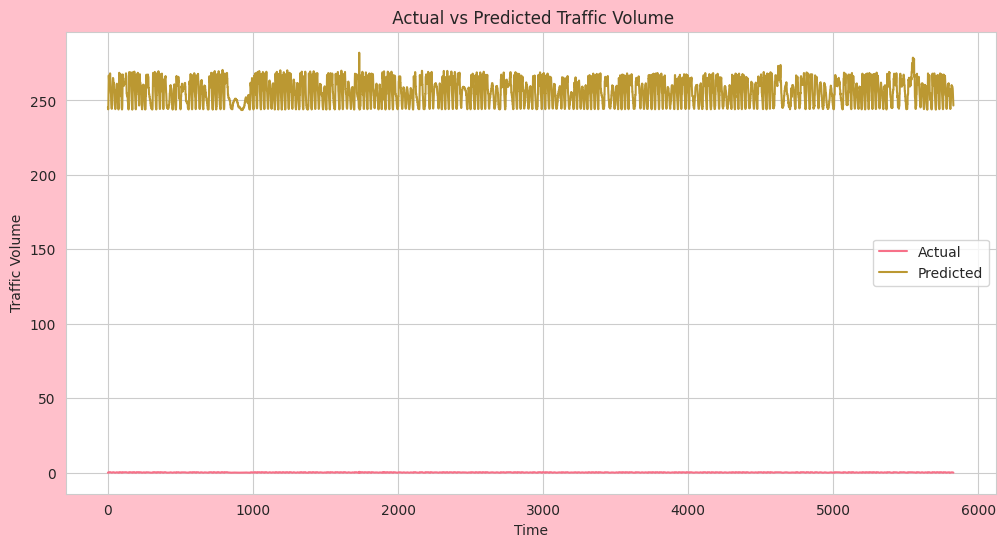

In [105]:
#plot (Actual vs Predicted Traffic Volume)
plt.figure(figsize=(12, 6) , facecolor=("pink"))
plt.plot(y_test, label='Actual')
plt.plot(predictions_lstm, label='Predicted')
plt.title(' Actual vs Predicted Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()

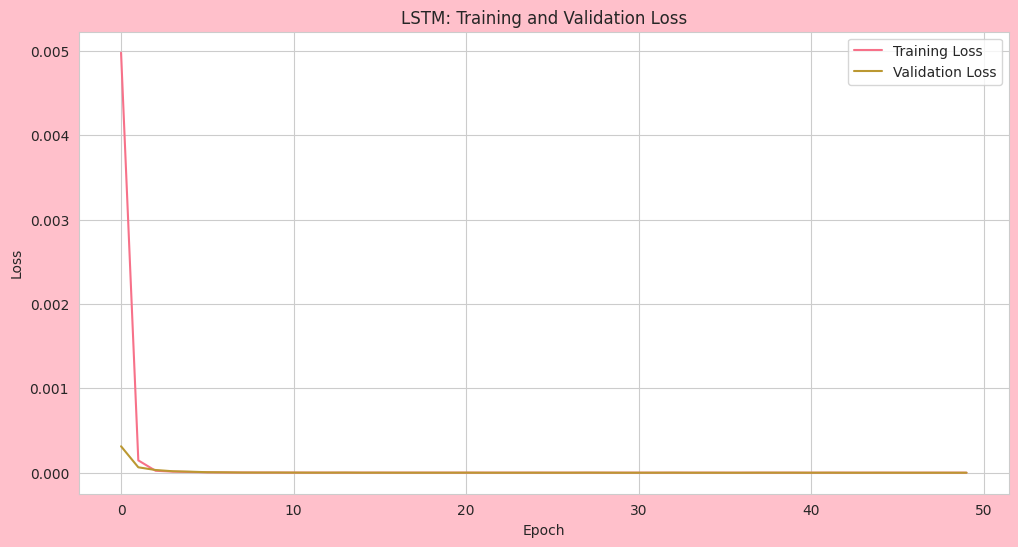

In [109]:
#plot loss & validatio loss
plt.figure(figsize=(12, 6) , facecolor=("pink"))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [113]:
X_train_rnn_w5 = train[numerical_cols].values.reshape(train.shape[0], len(numerical_cols), 1)
y_train_rnn_w5 = train['traffic_volume'].values

#define the model
model_rnn_w5 = Sequential()
model_rnn_w5.add(SimpleRNN(50, activation='relu', input_shape=(X_train_rnn_w5.shape[1], X_train_rnn_w5.shape[2])))
model_rnn_w5.add(Dense(1))
model_rnn_w5.compile(optimizer='adam', loss='mse')

#train
history_rnn_w5 = model_rnn_w5.fit(X_train_rnn_w5, y_train_rnn_w5, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0137 - val_loss: 9.5698e-05
Epoch 2/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.1616e-05 - val_loss: 4.7485e-05
Epoch 3/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.4454e-05 - val_loss: 5.8033e-05
Epoch 4/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4.4213e-05 - val_loss: 1.2540e-05
Epoch 5/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.5774e-05 - val_loss: 1.5953e-05
Epoch 6/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.4391e-05 - val_loss: 5.6292e-05
Epoch 7/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0945e-05 - val_loss: 2.3972e-05
Epoch 8/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.7328e-05 - val_loss: 6.0144e-06
Epoch 9/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 1.4441e-05 - val_loss: 1.7576e-05
Epoch 10/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3547e-05 - val_loss: 8.0583e-06
Epoch 11/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.3724e-06 -

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [114]:
X_test_rnn_w5 = test[numerical_cols].values.reshape(test.shape[0], len(numerical_cols), 1)
predictions_rnn_w5 = model_rnn_w5.predict(X_test_rnn_w5)


predictions_rnn_expanded_w5 = np.zeros((predictions_rnn_w5.shape[0], 10))
predictions_rnn_expanded_w5[:, 0] = predictions_rnn_w5[:, 0]
predictions_rnn_original_w5 = scaler.inverse_transform(predictions_rnn_expanded_w5)
predictions_rnn_w5 = predictions_rnn_original_w5[:, 0]

183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [116]:
predictions_rnn_w5

array([245.44170116, 244.38960904, 243.99545228, ..., 250.92025252,
       248.21887768, 246.31302452])

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [118]:
# Evaluate
mae_rnn_w5 = mean_absolute_error(y_test, predictions_rnn_w5)
mse_rnn_w5 = mean_squared_error(y_test, predictions_rnn_w5)
rmse_rnn_w5 = np.sqrt(mse_rnn_w5)

print('Evaluation (RNN) => for week 5 :')
print('MAE:', mae_rnn_w5)
print('MSE:', mse_rnn_w5)
print('RMSE:', rmse_rnn_w5)

Evaluation (RNN) => for week 5 :
MAE: 254.61852864161875
MSE: 64887.48642558402
RMSE: 254.73022283502996


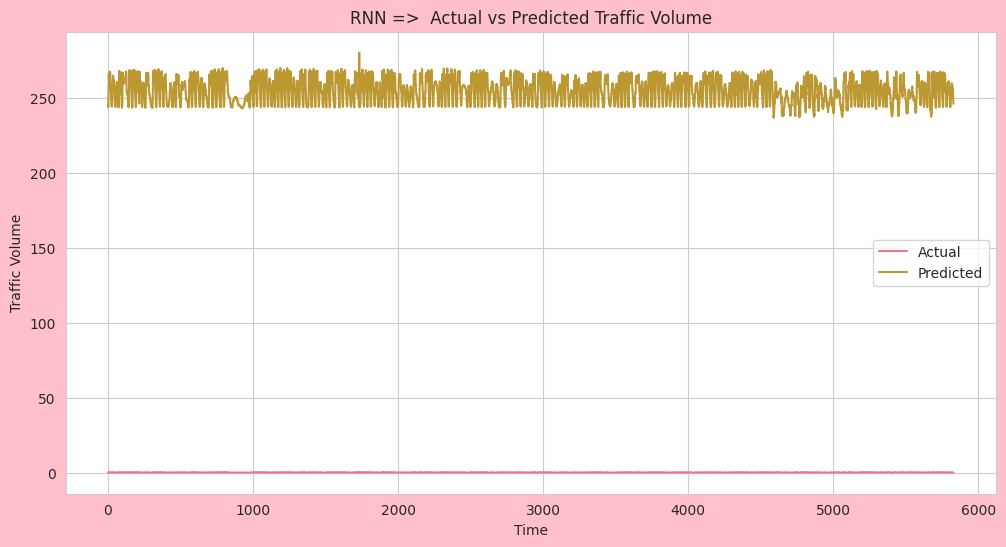

In [119]:
# Plot predicted vs actual values
plt.figure(figsize=(12, 6), facecolor=("pink"))
plt.plot(y_test, label='Actual')
plt.plot(predictions_rnn_w5, label='Predicted')
plt.title('RNN =>  Actual vs Predicted Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

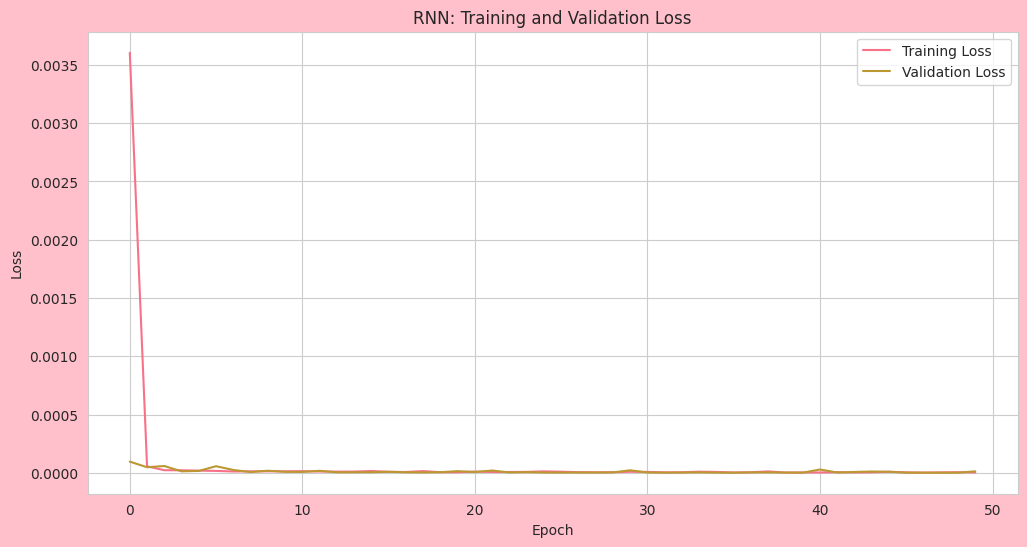

In [120]:
# Plot training and validation loss
plt.figure(figsize=(12, 6), facecolor=("pink"))
plt.plot(history_rnn_w5.history['loss'], label='Training Loss')
plt.plot(history_rnn_w5.history['val_loss'], label='Validation Loss')
plt.title('RNN: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

**Data Preprocessing:**

1. **Missing Data:** i checked for missing data and found that there were 20 rows with missing values in the `traffic_volume` column. These rows were dropped.

2. **Data Types:** Upon inspecting the data types, it was found that the `date_time` column was of type `object`. It was converted to the appropriate datetime format to ensure accurate time calculations.

3. **Normalization Techniques:** MinMaxScaler was used for normalization.

**Feature Engineering:**

- The weather conditions were converted into categorical variables to analyze the time series for seasonality.

**Model Architecture:**

Two models were selected:

- **LSTM (Long Short-Term Memory)**
- **RNN (Recurrent Neural Network)**

The models were trained and tested.